## Análise Exploratória de Dados com Python.

Bilbiotecas, frameworks e outras ferramentas utilizdas:

- numpy
- pandas
- matplotlib
- seaborn
- sciki-learn

Fonte de Dados: dados fictícios

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Carregando o Conjunto de Dados

In [4]:
dados = pd.read_csv('dataset.csv')

In [5]:
dados.shape

(500, 5)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [6]:
dados.describe()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.533462,33.053194,12.052488,37.060445,499.314038
std,0.999278,0.992563,0.994216,1.010489,79.314782
min,0.269901,29.532429,8.508152,33.913847,256.670582
25%,2.930450,32.341822,11.388153,36.349257,445.038277
50%,3.533975,33.082008,11.983231,37.069367,498.887875
75%,4.126502,33.711985,12.753850,37.716432,549.313828
max,6.922689,36.139662,15.126994,40.005182,765.518462


In [8]:
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
382,3.481062,32.386969,12.717995,35.128822,508.771907
331,1.810080,34.394327,12.807752,38.551030,467.427848
242,1.920715,34.878495,13.067896,36.678222,504.870432
286,5.000243,31.283447,12.725677,35.965667,591.781089
95,4.615426,32.302748,12.815393,37.957810,576.025244
487,4.041245,34.523020,11.405770,36.378271,541.049831
156,5.485977,32.931336,12.732212,35.600821,642.101579
53,2.721736,33.029332,11.765813,37.738525,423.179992
186,2.910038,33.924625,11.911416,38.274702,460.061277
279,1.494311,31.625360,13.187911,37.067090,376.336901


## Análise Exploratória de Dados

In [9]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [10]:
# Correlação 
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


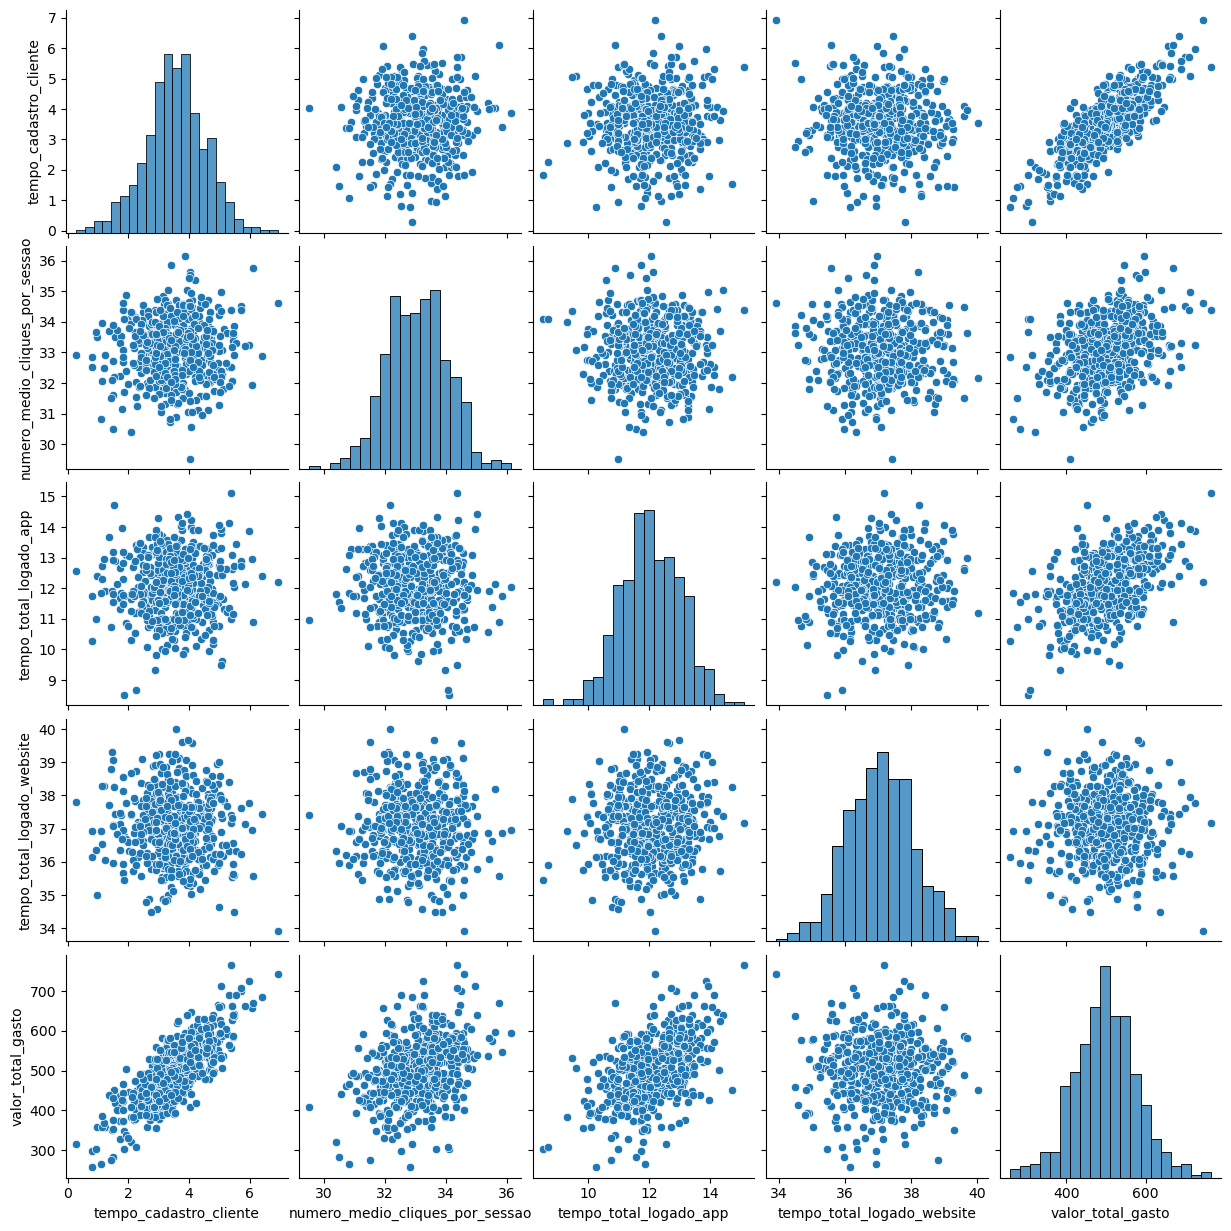

In [11]:
# Correlação visual
sns.pairplot(dados)

## Análise 1 - Relação Entre Tempo no Web Site e Valor Gasto

<Figure size 1800x1200 with 0 Axes>

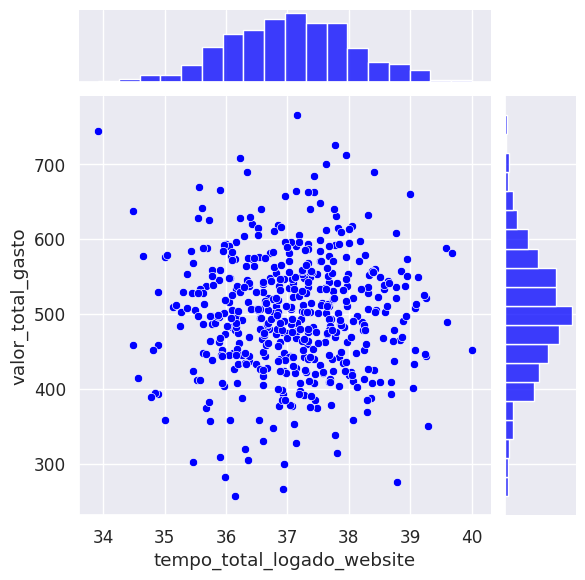

In [7]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
            x = 'tempo_total_logado_website',
            y = 'valor_total_gasto',
            color = 'blue')

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal)

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [8]:
# Correlação
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


Não parece haver correlação tempo logado no web site e o valor gasto pelos clientes.

## Análise 2 - Relação Entre Tempo no App  e Valor Gasto

<Figure size 1800x1200 with 0 Axes>

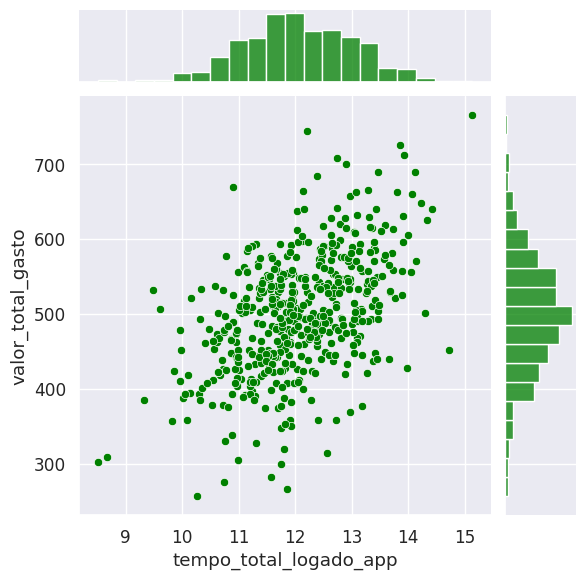

In [11]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
            x = 'tempo_total_logado_app',
            y = 'valor_total_gasto',
            color = 'green')

As variáveis parecem estar normalmente distribúidas

Parece haver uma correlação entre tempo total logado no app e o valor total gasto

In [10]:
# Correlação
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


Os dados tem uma correlação positiva moderada. Podemos deduzir que o valor total gasto mensalmente tende a aumentar se o cliente passar mais tempo logado no app.

## Análise 3 - Relação Entre Tempo no App  e Tempo de Cadastro

In [13]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

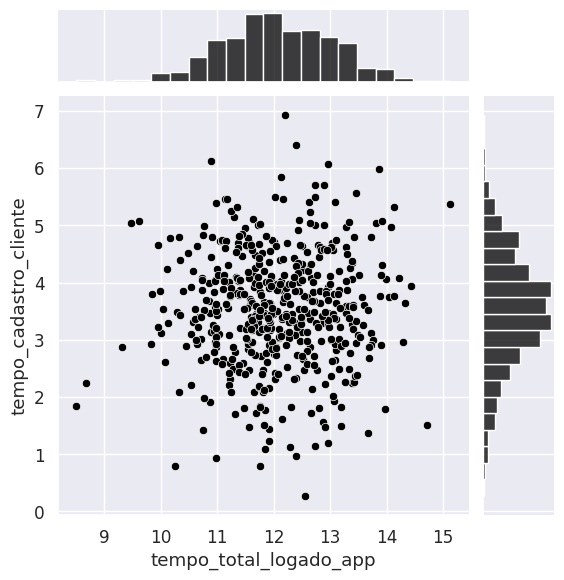

In [14]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
            x = 'tempo_total_logado_app',
            y = 'tempo_cadastro_cliente',
            color = 'black')

As variáveis possuem uma distribuição normal.

Podemos observar que os dados são muito densos no meio do gráfico, não havendo uma correlação clara. Podemos deduzir que existem muitos clientes que são membbros há 3-4 anos e gastam aproximadamente 11,5 a 12,5 minutos no app.

In [15]:
# Correlação
dados[['tempo_cadastro_cliente', 'tempo_total_logado_app']].corr()

,tempo_cadastro_cliente,tempo_total_logado_app
tempo_cadastro_cliente,1.000000,0.029143
tempo_total_logado_app,0.029143,1.000000


Não há uma correlação entre as duas variáveis

## Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto

In [17]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

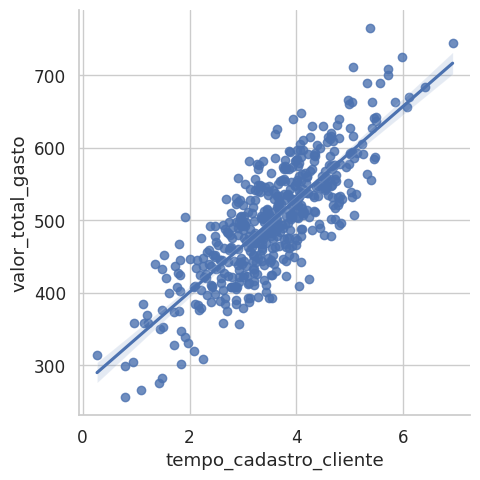

In [24]:
# Plot
plt.figure(figsize = (18, 12))
sns.set_style('whitegrid')
sns.lmplot(y = 'valor_total_gasto', x = 'tempo_cadastro_cliente', data = dados)

Claramente existe uma correlação entre o tempo de cadastro do cliente e o valor gasto por ele. Ou seja, quanto mais tempo o cliente é cadastrado, mais ele tende a gastar.

Outra coisa a se notar é que a sombra ao redor da linha é muito fina, o que significa que o erro entre estimativa (linha) e os pontos de dados são relativamente pequenos. 

In [25]:
# Correlação
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


Existe uma correlação forte entre as duas variáveis.

## Análise 5 - Relação Entre Tempo Logado na App e Tempo Logado no Web Site

<Figure size 1800x1200 with 0 Axes>

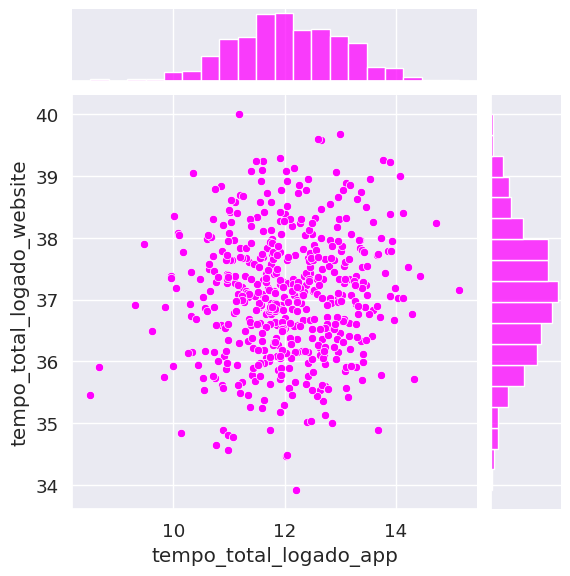

In [28]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados,
            x = 'tempo_total_logado_app',
            y = 'tempo_total_logado_website',
            color = 'magenta')

Não foi decectado problemas críticos e podemos seguir adiante. Vamos manter a vriável preditora com baixa correlação e validar essa relação com a variável alvo no modelo final.

## Pré-Processamento de Dados para Construção de Modelos de Machine Learning

In [31]:
dados.columns


Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [32]:
X = dados[['tempo_cadastro_cliente',
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app',
           'tempo_total_logado_website']]

In [33]:
y = dados['valor_total_gasto']

In [34]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [38]:
X_treino.shape

(350, 4)

In [39]:
X_teste.shape

(150, 4)

## Padronização

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(X_treino)

StandardScaler()

In [42]:
X_treino = scaler.transform(X_treino)

In [43]:
X_teste = scaler.transform(X_teste)

In [44]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [45]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

## Construção, Treinamento e Avaliação do Modelo 1 com Regressão Linear (Benchmark)

In [46]:
# Cria o modelo
modelo_v1 = LinearRegression()

In [47]:
# Treinamento
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [48]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [50]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


## Avaliação do Modelo

In [51]:
pred_v1 = modelo_v1.predict(X_teste)

In [53]:
# Imprime as 10 primeiras previsões
print(pred_v1[:10])

[513.06429807 593.96597774 621.6550031  495.82353395 642.08919639
 615.61800045 592.1273355  493.61084354 457.58835597 532.03644608]


Text(0, 0.5, 'Valor Previsto de Y')

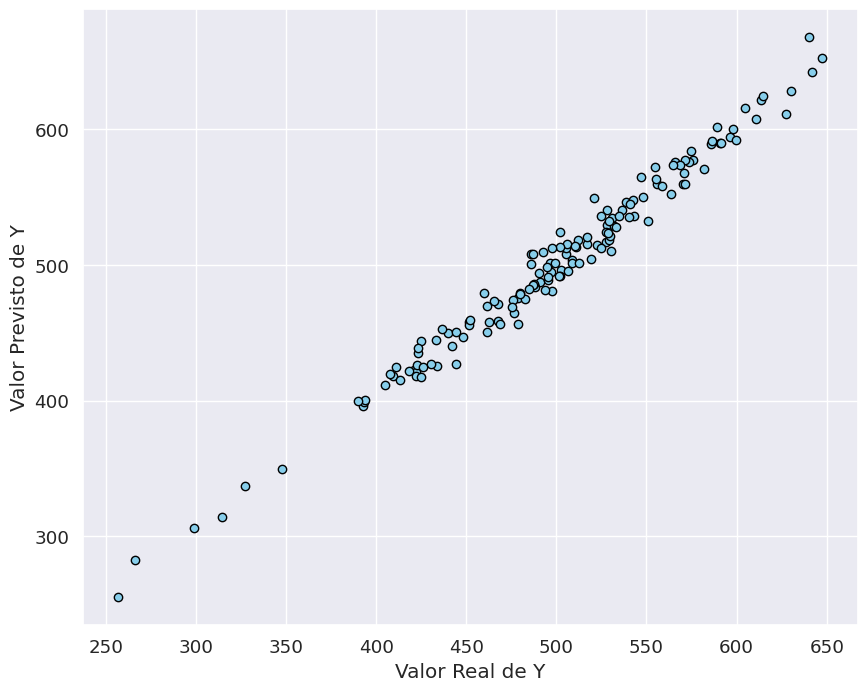

In [55]:
# Plot
plt.figure(figsize = (10, 8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')

A partir do gráfico de dispersão, podemos ver que há uma correlação muito forte entre os y's reais nos dados de teste. Isso significa que temos um modelo muito bom

## Métricas


In [57]:
# Valor médio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826080003

In [58]:
# Valor minimo
dados['valor_total_gasto'].min()

256.6705823

In [59]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

In [61]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

7.76241864577898

O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 7,76 reais, o que é um valor pequeno comparado ao valor médio por cliente.

In [62]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v1)

94.95654308438664

In [63]:
# RMSE - Raiz quadrada de erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

9.744564797074656

O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 9,74 reais, o que é um valor pequeno comparado ao valor médio por cliente.

In [69]:
## Coeficiente R2
r2_score(y_teste, pred_v1)

0.9813622791776302

In [70]:
# Variância Explicada
explained_variance_score(y_teste, pred_v1)

0.9817449183428639

Nosso modelo é capaz de explicar 98% da variância dos dados, o que é excelente.

O coeficiente R2 de 98% e as outras métricas, demonstram que este é um modelo muito bom. Será que conseguimos melhorar essa performance?

## Resíduos

### OBS: Uma das premissas para modelos de regressão é que o resíduos sigam uma destribuição normal

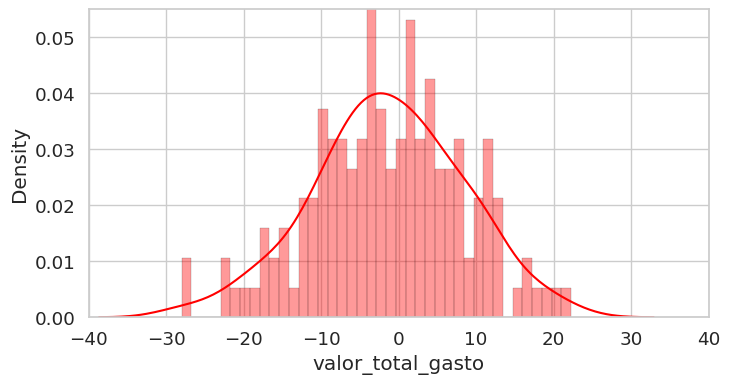

In [76]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

Como os resíduos possuem uma distribuição normal, indica que temos um bom modelo.

## Construção, Treinamento e Avaliação do Modelo 2 com Regressão Ridge

In [77]:
# Cria o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [78]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [80]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [81]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [83]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

Text(0, 0.5, 'Valor Previsto de Y')

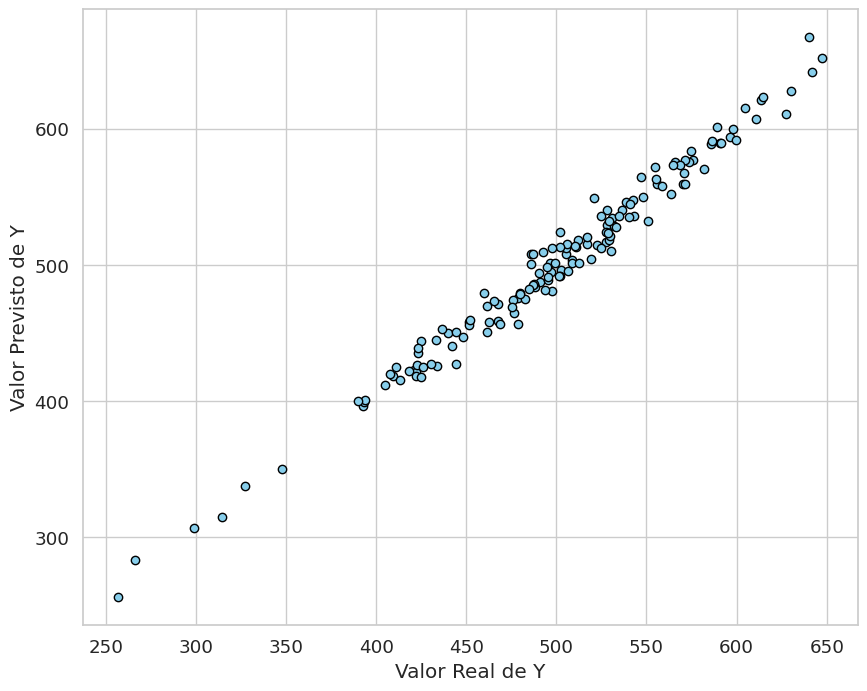

In [84]:
# Plot
plt.figure(figsize = (10, 8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')

In [85]:
# MAE
mean_absolute_error(y_teste, pred_v2)

7.764151148981964

In [86]:
# NSE
mean_squared_error(y_teste, pred_v2)

94.93731602493467

In [87]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

9.7435781941202

In [88]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [89]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.9817472659016085

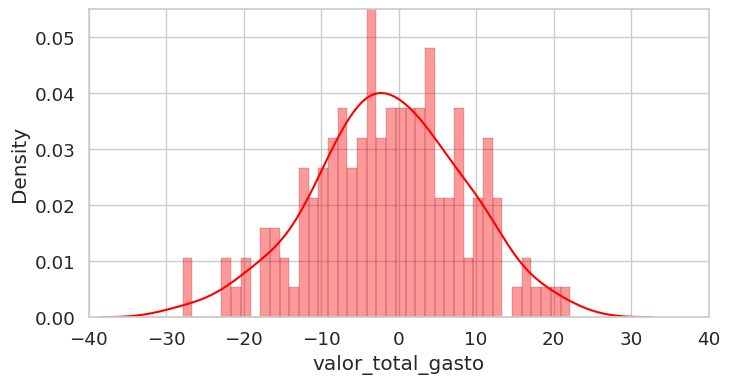

In [90]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Construção, Treinamento e Avaliação do Modelo 2 com Regressão LASSO

In [100]:
modelo_v3 = Lasso(alpha = 1.0)

In [101]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [102]:
print('Coeficientes: \n', modelo_v3.coef_)

Coeficientes: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [103]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [105]:
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

Text(0, 0.5, 'Valor Previsto de Y')

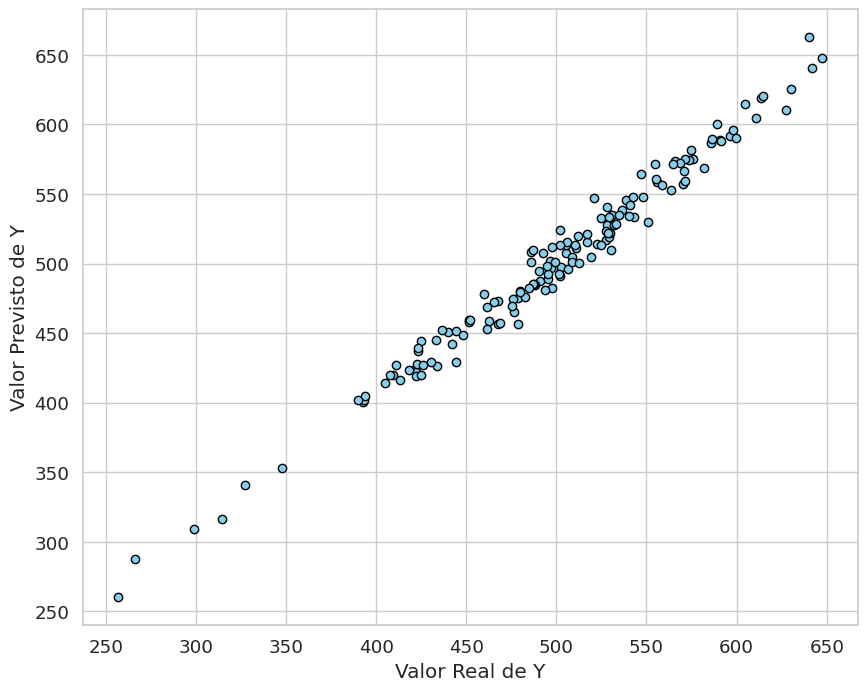

In [106]:
# Plot
plt.figure(figsize = (10, 8))
plt.scatter(x = y_teste, y = pred_v3, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y')

In [107]:
# MAE
mean_absolute_error(y_teste, pred_v3)

7.788504696951063

In [108]:
# MSE
mean_squared_error(y_teste, pred_v3)

96.0560634897067

In [109]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

9.800819531534426

In [110]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [111]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.9815600649101045

## Seleção do Modelo


O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado. Os modelos 1 e 2 ficaram muito próximos e nesse caso devemos escolher o modelo mais simples, que em nosso exemplo é o modelo 1.

## Conclusão

In [113]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


#### Interpretações dos Coeficientes:

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26.24 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38.57 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$ 0.68 no valor total gasto por cliente por mês.

Podemos ver que será mais lucrativo para a empresa investir na atualização da sua app uma vez que o retorno será maior. Além disso, é importante criar políticas para reter o cliente por mais tempo, já que isso também leva ao aumento das vendas. A própria atualização da app será uma forma de reter o cliente por mais tempo.

Não compensa, neste momento, investir na atualização do web site pois o retorno será mínimo.